<a href="https://colab.research.google.com/github/theabhinav0231/dive_into_deep_learning_book/blob/main/09_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfull

In [2]:
%matplotlib inline
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l
import math

## **Hidden State**

A hidden state in the context of Recurrent Neural Networks (RNNs) is a vector that serves as a memory mechanism, capturing and retaining information about the sequence of inputs up to the current time step. It is the core component that allows RNNs to process sequential data effectively.

1. Representation of Context:

  - The hidden state at time step
𝑡, denoted as
𝐻𝑡, encodes information from both:
The current input (𝑋𝑡).
The hidden state from the previous time step (𝐻𝑡 − 1).
This allows the model to remember relevant information from earlier in the sequence.

2. Recurrent Nature:

  - The hidden state is updated iteratively at each time step using:

    
    𝐻𝑡 = 𝜙(𝑋𝑡 𝑊𝑥ℎ + 𝐻𝑡−1 𝑊ℎℎ + 𝑏ℎ)

    𝑊𝑥ℎ: Weights for the current input.

    𝑊ℎℎ: Weights for the previous hidden state.

    𝑏ℎ: Bias term.

    𝜙: Activation function (e.g., tanh or ReLU).

3. Memory of the Sequence:

  - The hidden state stores historical information from the sequence and allows the model to relate the current input to past inputs.
For example, in language modeling, the hidden state might capture the grammatical structure or meaning of the previous words.

4. Shared Across Time Steps:

 - Hidden states are passed from one time step to the next, making the computation recurrent.
This allows RNNs to handle sequences of varying lengths using a fixed set of parameters.

5. Dependency on Sequence Length:

 - The hidden state 𝐻𝑡 depends on all previous inputs (𝑋1, 𝑋2,..., 𝑋𝑡) indirectly through 𝐻𝑡−1.

 6. Final Output Connection:

 - The hidden state 𝐻𝑡 is often used to compute the output 𝑂𝑡 at each time step:

    𝑂𝑡 = 𝐻𝑡 𝑊ℎ𝑞 + 𝑏𝑞

## **Recurrent Neural Networks**

1. Inputs and Hidden States:

 - At each time step 𝑡, the input 𝑋𝑡 ∈ 𝑅𝑛×𝑑 represents a minibatch of 𝑛 examples, each with 𝑑 features.
The hidden state 𝐻𝑡 ∈ 𝑅𝑛×ℎ encodes information from both the current input 𝑋𝑡 and the hidden state of the previous time step
𝐻𝑡−1.

2. Hidden State Calculation:

 - The hidden state is updated using:

    𝐻𝑡 = 𝜙(𝑋𝑡 𝑊𝑥ℎ + 𝐻𝑡−1 𝑊ℎℎ + 𝑏ℎ)

    𝑊𝑥ℎ ∈ 𝑅𝑑×ℎ: Weights for the current input.

    𝑊ℎℎ ∈ 𝑅ℎ×ℎ: Weights for the previous hidden state.

    𝑏ℎ ∈ 𝑅1×ℎ: Bias.

    This recurrent computation enables the hidden state to retain historical sequence information, effectively acting as the "memory" of the network.

3. Output Layer:

 - At each time step 𝑡, the output 𝑂𝑡 is computed from the hidden state:

    𝑂𝑡 = 𝐻𝑡 𝑊ℎ𝑞 + 𝑏𝑞

    𝑊ℎ𝑞 ∈ 𝑅ℎ×𝑞: Weights for the output layer.

    𝑏𝑞 ∈ 𝑅1×𝑞: Bias.

4. Recurrent Nature:

 - The recurrence lies in how the hidden state
𝐻𝑡 depends on 𝐻𝑡−1, making the computation sequential.
Despite handling sequences of varying lengths, the model's parameters (𝑊𝑥ℎ, 𝑊ℎℎ, 𝑏ℎ, 𝑊ℎ𝑞, 𝑏𝑞) remain constant, avoiding growth in parameter size as the number of time steps increases.

5. RNN Layers:

 - The layers that compute 𝐻𝑡 are called recurrent layers. They concatenate the current input 𝑋𝑡 and the previous hidden state 𝐻𝑡−1, then pass the result through a fully connected layer with an activation function 𝜙.

6. Visualization:

 - At each time step, 𝐻𝑡 is influenced by both the current input 𝑋𝑡 and the past hidden state 𝐻𝑡−1. It contributes to the computation of the next hidden state 𝐻𝑡+1 and the current output 𝑂𝑡.


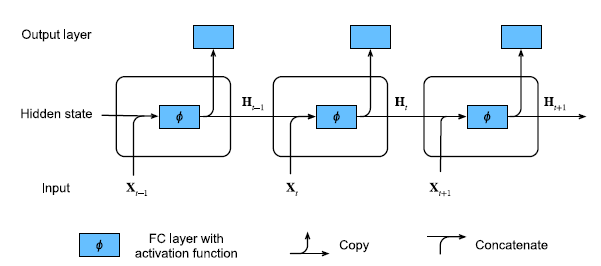

## **Character Level Language Model Based on RNN**

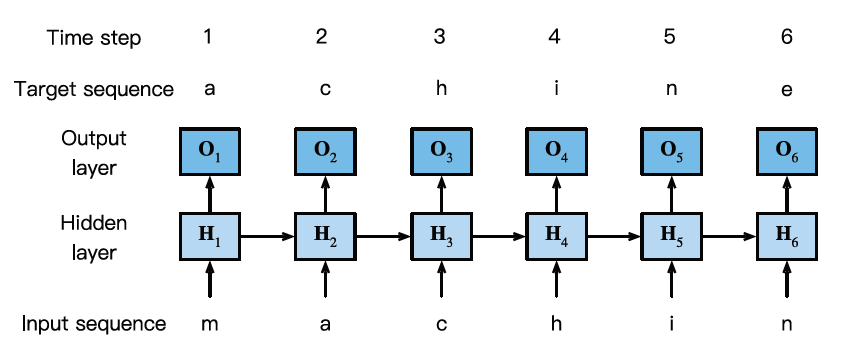

## **RNN Implementation from Scratch**

Input size explain: [num_steps, batch_size, num_hiddens]

num_steps -> The number of tokens in the sentence. For "I love AI", num_steps = 3 because there are 3 words.

batch_size -> The number of sequences in the batch. For one sentence,
batch_size = 1

num_hiddens -> Size of the word embedding vector. Here, num_inputs = 4

Word Embedding example:

"I" → [0.1, 0.2, 0.3, 0.4]

"love" → [0.5, 0.6, 0.7, 0.8]

"AI" → [0.9, 1.0, 1.1, 1.2]


In [3]:
class RNNScratch(d2l.Module):
  def __init__(self, num_inputs, num_hiddens, sigma=0.01):
    super().__init__()
    self.save_hyperparameter()
    self.W_xh = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
    self.W_hh = nn.Parameter(torch.randn(num_hiddens, num_hiddens) * sigma)
    self.b_h = nn.Parameter(torch.zeros(num_hiddens))

  def forward(self, inputs, state=None):
    if state is not None:
      # initial state with shape: (batch_size, num_hiddens)
      state = torch.zeros((inputs.shape[1], self.num_hiddens), device=inputs.device)
    else:
      state, = state
    outputs = []
    for X in inputs:  # size of input: (num_steps, batch_size, num_inputs)
      state = torch.tanh(torch.matmul(X, self.W_xh) + torch.matmul(state, self.W_hh) + self.b_h)
      outputs.append(state)
    return outputs, state